In [25]:
import datetime
from packaging import version
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
from sklearn.model_selection import train_test_split

from collections import Counter
import numpy as np
import pandas as pd

In [3]:
#!pip install tensorflow

In [20]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist

In [7]:
!wget https://github.com/erinmcmahon26/MNIST-Digit-Recognizer-Kaggle-Competition/archive/refs/heads/main.zip 

--2022-02-17 20:23:40--  https://github.com/erinmcmahon26/MNIST-Digit-Recognizer-Kaggle-Competition/archive/refs/heads/main.zip
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/erinmcmahon26/MNIST-Digit-Recognizer/archive/refs/heads/main.zip [following]
--2022-02-17 20:23:40--  https://github.com/erinmcmahon26/MNIST-Digit-Recognizer/archive/refs/heads/main.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/erinmcmahon26/MNIST-Digit-Recognizer/zip/refs/heads/main [following]
--2022-02-17 20:23:40--  https://codeload.github.com/erinmcmahon26/MNIST-Digit-Recognizer/zip/refs/heads/main
Resolving codeload.github.com (codeload.github.com)... 140.82.113.9
Connecting to codeload.github.com (codeload.github.com)|140.82.113.9|:443... connected.
HTTP 

In [8]:
!unzip "/content/main.zip" -d "/content/output_folder/"

Archive:  /content/main.zip
6ec5f01421e8685f76b580ea0bdb0071fb7afc34
   creating: /content/output_folder/MNIST-Digit-Recognizer-main/
  inflating: /content/output_folder/MNIST-Digit-Recognizer-main/Digit_Recognizer_NN.ipynb  
  inflating: /content/output_folder/MNIST-Digit-Recognizer-main/MNIST_Digit_Recognizer.ipynb  
  inflating: /content/output_folder/MNIST-Digit-Recognizer-main/README.md  
 extracting: /content/output_folder/MNIST-Digit-Recognizer-main/test.csv.zip  
 extracting: /content/output_folder/MNIST-Digit-Recognizer-main/train.csv.zip  


In [14]:
!unzip "/content/output_folder/MNIST-Digit-Recognizer-main/train.csv.zip" -d "/content/output_folder/MNIST-Digit-Recognizer-main/csvs"

Archive:  /content/output_folder/MNIST-Digit-Recognizer-main/train.csv.zip
  inflating: /content/output_folder/MNIST-Digit-Recognizer-main/csvs/train.csv  


In [9]:
!unzip "/content/output_folder/MNIST-Digit-Recognizer-main/test.csv.zip" -d "/content/output_folder/MNIST-Digit-Recognizer-main/csvs"

Archive:  /content/output_folder/MNIST-Digit-Recognizer-main/test.csv.zip
  inflating: /content/output_folder/MNIST-Digit-Recognizer-main/csvs/test.csv  


In [15]:
df_train = pd.read_csv('/content/output_folder/MNIST-Digit-Recognizer-main/csvs/train.csv')

In [12]:
df_test = pd.read_csv('/content/output_folder/MNIST-Digit-Recognizer-main/csvs/test.csv')

In [35]:
y = df_train['label']
x = df_train.drop(columns = ['label'])

In [36]:
test = df_test

In [37]:
x = x/255
test = test/255

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)

In [39]:
type(x_train)

pandas.core.frame.DataFrame

In [40]:
# function for reshaping x for keras
def convert_shape(x):
  x.values.reshape(x.shape[0], 28,28,1)

In order to use keras, every image needs to be represented as a 28x28 array instead of a 1D array of size 784. We need to do this for all x values for train and test. 

In [41]:
x_train = convert_shape(x_train)
x_test = convert_shape(x_test)
test = convert_shape(test)

Models

In [45]:
model = Sequential([keras.layers.Flatten(input_shape=[28,28]), 
                    keras.layers.Dense(300, activation='relu'), 
                    keras.layers.Dense(100, activation='relu'),
                    keras.layers.Dense(10, activation='softmax')])

Sequential: most simple keras model which is composed of a single stack of layers connected sequnetially. 

Flatten: convert each image into a 1D array.

Dense: each dense layer manages its own weight matrix which contains all connection weights between neurons and their inputs. 'relu' uses the ReLU activation function which is a piecewise linear function that will output the input directly if it is positive or output zero if it is not. 

In [46]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


Summary shows all of the model's layers, it's output shape, and number of parameters. This summary is stating that all parameters are trainable. 

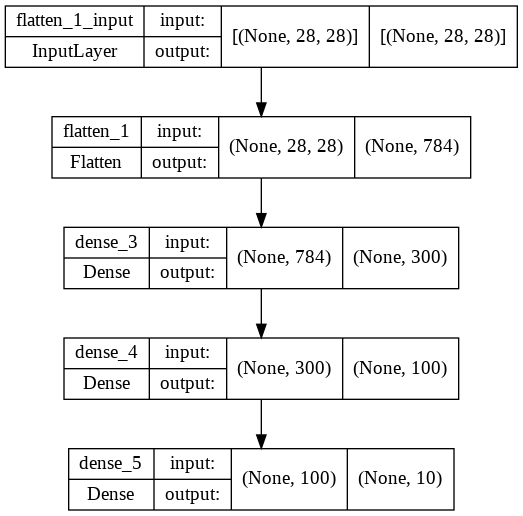

In [47]:
keras.utils.plot_model(model, show_shapes=True) 